In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import getcwd
from sklearn.metrics import pairwise_distances
from warnings import filterwarnings
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import MinMaxScaler
from sys import modules
%matplotlib inline

filterwarnings('ignore')

# Introduction

Hierarchical clustering iteratively **fuses** the data samples one to the other to gradually form clusters. at each iteration the data points which are the closest are fused together, and their "distance" is recorded. When data samples are measured one against the other their distance is calculated by the **metirc**, but when clusters are compared, their distance is measured by a **linkage** function. The representation of this agglomerative process is called **dendrogram**.

This clustering method is implemented in Scikit-learn under the [AgglomerativeClustering][1] class, but it does not support the dendrogram plot, so I refer here directly to SciPy's underlying [cluster.hierarchy][2] module.

[1]: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering "AgglomerativeClustering class"
[2]: http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html "cluster.hierarchy module"


## Illustrative example

### The data

Let's construct an obvious case of three clusters.

In [0]:
x = np.array([-3, -3, -2, -2,
               1,  2,  2,  2,  3,
              -3, -2, -1])
y = np.array([ 3,  2,  3,  2,
               2,  1,  2,  3,  2,
              -3, -1, -3])

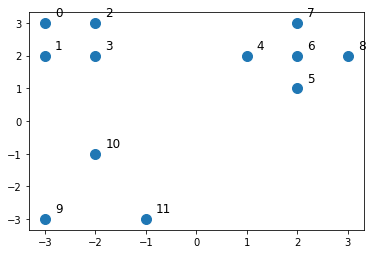

In [3]:
plt.scatter(x, y, s=100)
for i, (a, b) in enumerate(zip(x, y)):
    plt.text(a+0.2, b+0.2, str(i), size=12)

It will be useful to recall the concept of the metric and have a look at the distance matrix of the points.

In [0]:
points = pd.DataFrame({'x': x, 'y': y})
d = pairwise_distances(points, metric='euclidean')
pd.DataFrame(d).ix[:6, :6]

,0,1,2,3,4,5,6
0,0.000000,1.000000,1.000000,1.414214,4.123106,5.385165,5.099020
1,1.000000,0.000000,1.414214,1.000000,4.000000,5.099020,5.000000
2,1.000000,1.414214,0.000000,1.000000,3.162278,4.472136,4.123106
3,1.414214,1.000000,1.000000,0.000000,3.000000,4.123106,4.000000
4,4.123106,4.000000,3.162278,3.000000,0.000000,1.414214,1.000000
5,5.385165,5.099020,4.472136,4.123106,1.414214,0.000000,1.000000
6,5.099020,5.000000,4.123106,4.000000,1.000000,1.000000,0.000000


### The linkage matrix

The clustering process uses a special distance concept called **linkage**, which is a generalization of the ditance concept when applying it to clusters of points. At every step of the clustering the algorithm looks for the two nearest clusters and combines them. The result of this process is the **linkage matrix** (usually called _Z_).

The data-frame below is the linkage matrix of the data above. Each row represents a step in the process, in which two clusters are fused together. the columns 'cluster 1' and 'cluster 2' tell which clusters are fused, the column 'distance' tell the distance (linkage) between the clusters, the column 'cluster size' tell the size o the new cluster, and the column 'new cluster' tell the name of the new cluster.

In [0]:
Z = linkage(points, method='complete', metric='euclidean')
Z_df = pd.DataFrame(Z,
                    columns=['cluster 1', 'cluster 2', 
                             'distance', 'cluster size'])
Z_df = pd.concat((Z_df, pd.Series(range(12,23), name='new_cluster')), axis=1)
Z_df

,cluster 1,cluster 2,distance,cluster size,new_cluster
0,0.0,1.0,1.000000,2.0,12
1,2.0,3.0,1.000000,2.0,13
2,4.0,6.0,1.000000,2.0,14
3,12.0,13.0,1.414214,4.0,15
4,5.0,14.0,1.414214,3.0,16
5,7.0,8.0,1.414214,2.0,17
6,9.0,11.0,2.000000,2.0,18
7,16.0,17.0,2.000000,5.0,19
8,10.0,18.0,2.236068,3.0,20
9,15.0,19.0,6.082763,9.0,21


### The clustering

In order to extract the clusters from the dendrogram, all we have to do is to "cut" at in some linkage value. This is performed by the [fcluster][fclust] function, which returns an array of integers in the length of the number of data points, in which each number corresponds to the cluster to which the data sample belongs.

[fclust]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html "fcluster() API"

In [0]:
cluster = fcluster(Z, t=3, criterion='maxclust')
print cluster

[2 2 2 2 3 3 3 3 3 1 1 1]


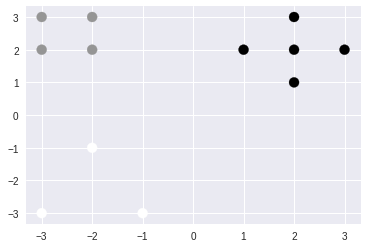

In [0]:
plt.scatter(x, y, c=cluster, s=100)

### Visualization

The process of building the linkage matrix is represented by special plot called **dendrogram**. Its x-axis is simply the numbers of the original single-point clusters, and its y-axis is the linkage value. This visualization is achieved by the [dendrogram][1] function, and apart from the plot itself, some representation information is returned.

[1]: http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html "dendrogram API"

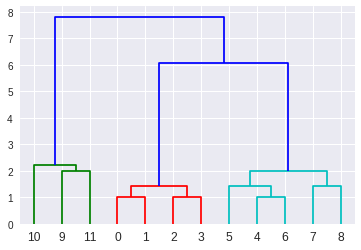

In [0]:
dn = dendrogram(Z, color_threshold=4)

# The linkage function

Just like the metric has a significant role in determining classifications and clustering, the linkage is also important. There  are several common linkage functions that are used, but the most widely used linkages are: complete, average and Ward.

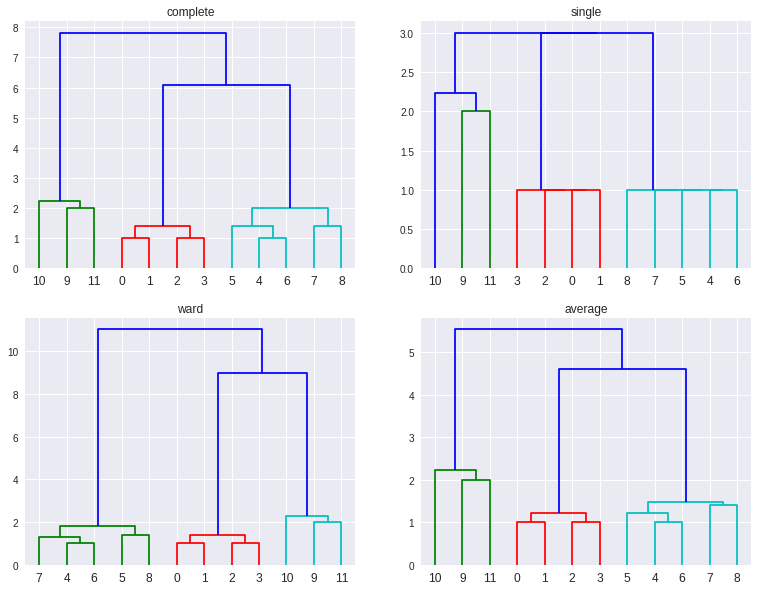

In [0]:
plt.figure(figsize=(13, 10))
methods = ['complete', 'single', 'ward', 'average']

for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(points, method=method)
    dn = dendrogram(Z)
    plt.title(method)

## Illustration

Evidently, for well-separated data most linkages will return the same clusters. However, when the data is more complicated, it is very important to choose the linkage wisely.

In [0]:
if 'google.colab' in modules:
    from google.colab import files
    uploaded = files.upload()

Saving weight.txt to weight (1).txt


In [4]:
weights = pd.read_csv("people.txt")
weights.head()

,Sex,Age,Height,Weight
0,f,26,171.1,57.0
1,m,44,180.1,84.7
2,m,32,161.9,73.6
3,m,27,176.5,81.0
4,f,26,167.3,57.4


We scale the data to have comparable features.

In [5]:
weights['Height'] = MinMaxScaler().fit(weights[['Height']])\
    .transform(weights[['Height']])
weights['Weight'] = MinMaxScaler().fit(weights[['Weight']])\
    .transform(weights[['Weight']])
weights.head()

,Sex,Age,Height,Weight
0,f,26,0.564033,0.208243
1,m,44,0.809264,0.809111
2,m,32,0.313351,0.568330
3,m,27,0.711172,0.728850
4,f,26,0.460490,0.216920


Now let's try different linkage methods (e.g. 'complete', 'single', 'ward').

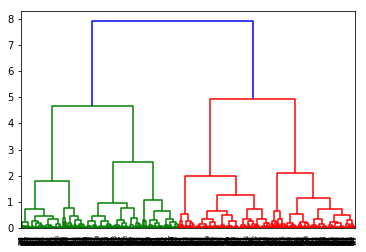

In [10]:
Z = linkage(weights[['Height', 'Weight']],
            method='ward')
dn = dendrogram(Z)

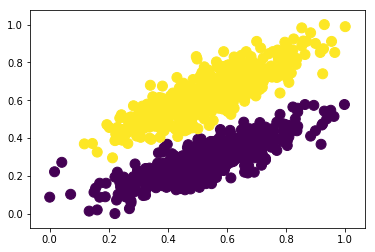

In [11]:
weights['cluster'] = fcluster(Z, 2, criterion='maxclust')
plt.scatter(weights.Height, weights.Weight, 
            c=weights.cluster, s=100)